In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../datasets/diamond_pricing.csv')
df.head()

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


In [3]:
x = df[['Paleonium','Pressure']]
y = df['Price']

In [4]:
data_matrix = xgb.DMatrix(data= x,label = y)
data_matrix

In [5]:
trainx,testx,trainy,testy = train_test_split(x,y,test_size=.2,random_state=0)

In [6]:
xreg = xgb.XGBRegressor(learning_rate=.1,max_depth=5,n_estimators=10)
xreg.fit(trainx,trainy)
ypred=xreg.predict(testx)
rmse = np.sqrt(mean_squared_error(testy,ypred))
rmse

750.8412500571342

In [7]:
params = {
    'learning_rate':.1,
    'max_depth':5,
    'alpha':.5
}

In [8]:
result = xgb.cv(dtrain= data_matrix,
                params= params,
                nfold = 3,
                num_boost_round=100,
                early_stopping_rounds=10,
                metrics='rmse',
                seed = 0 )
result

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1909.457072,7.466657,1908.681682,16.597358
1,1724.537720,6.889131,1723.793498,15.587614
2,1557.888061,5.959141,1557.173340,14.134720
3,1407.528768,5.323212,1407.451701,13.729375
4,1272.260539,4.623263,1272.977295,13.218985
...,...,...,...,...
95,40.539177,0.829002,89.450045,4.735011
96,40.474212,0.826967,89.454821,4.726609
97,40.342437,0.760415,89.394264,4.677695
98,40.241357,0.744543,89.326978,4.649570


<AxesSubplot:>

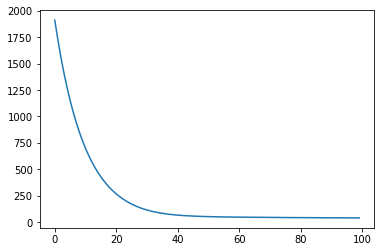

In [9]:
result['train-rmse-mean'].plot()